In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
data=pd.read_csv("Hospital_Cost_Report.csv")

In [4]:
data.head()

,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,Provider Type,Type of Control,Fiscal Year Begin Date,Fiscal Year End Date,FTE - Employees on Payroll,Number of Interns and Residents (FTE),Total Days Title V,Total Days Title XVIII,Total Days Title XIX,Total Days (V + XVIII + XIX + Unknown),Number of Beds,Total Bed Days Available,Total Discharges Title V,Total Discharges Title XVIII,Total Discharges Title XIX,Total Discharges (V + XVIII + XIX + Unknown),Total Days Title V + Total for all Subproviders,Total Days Title XVIII + Total for all Subproviders,Total Days Title XIX + Total for all Subproviders,Total Days (V + XVIII + XIX + Unknown) + Total for all Subproviders,Number of Beds + Total for all Subproviders,Total Bed Days Available + Total for all Subproviders,Total Discharges Title V + Total for all Subproviders,Total Discharges Title XVIII + Total for all Subproviders,Total Discharges Title XIX + Total for all Subproviders,Total Discharges (V + XVIII + XIX + Unknown) + Total for all Subproviders,Hospital Total Days Title V For Adults & Peds,Hospital Total Days Title XVIII For Adults & Peds,Hospital Total Days Title XIX For Adults & Peds,Hospital Total Days (V + XVIII + XIX + Unknown) For Adults & Peds,Hospital Number of Beds For Adults & Peds,Hospital Total Bed Days Available For Adults & Peds,Hospital Total Discharges Title V For Adults & Peds,Hospital Total Discharges Title XVIII For Adults & Peds,Hospital Total Discharges Title XIX For Adults & Peds,Hospital Total Discharges (V + XVIII + XIX + Unknown) For Adults & Peds,Cost of Charity Care,Total Bad Debt Expense,Cost of Uncompensated Care,Total Unreimbursed and Uncompensated Care,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Depreciation Cost,Total Costs,Inpatient Total Charges,Outpatient Total Charges,Combined Outpatient + Inpatient Total Charges,Wage-Related Costs (Core),Wage-Related Costs (RHC/FQHC),Total Salaries (adjusted),Contract Labor,Wage Related Costs for Part - A Teaching Physicians,Wage Related Costs for Interns and Residents,Cash on Hand and in Banks,Temporary Investments,Notes Receivable,Accounts Receivable,Less: Allowances for Uncollectible Notes and Accounts Receivable,Inventory,Prepaid Expenses,Other Current Assets,Total Current Assets,Land,Land Improvements,Buildings,Leasehold Improvements,Fixed Equipment,Major Movable Equipment,Minor Equipment Depreciable,Health Information Technology Designated Assets,Total fixed Assets,Investments,Other Assets,Total Other Assets,Total Assets,Accounts Payable,"Salaries, Wages, and Fees Payable",Payroll Taxes Payable,Notes and Loans Payable (Short Term),Deferred Income,Other Current Liabilities,Total Current Liabilities,Mortgage Payable,Notes Payable,Unsecured Loans,Other Long Term Liabilities,Total Long Term Liabilities,Total Liabilities,General Fund Balance,Total Fund Balances,Total Liabilities and Fund Balances,DRG Amounts Other Than Outlier Payments,DRG amounts before October 1,DRG amounts after October 1,DRG Amounts for Model 4 BPCI before October 1,DRG Amounts for Model 4 BPCI after October 1,Outlier payments for discharges,Disproportionate Share Adjustment,Allowable DSH Percentage,Managed Care Simulated Payments,Total IME Payment,Inpatient Revenue,Outpatient Revenue,Gross Revenue,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
0,623132,10032,WEDOWEE HOSPITAL,301 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,99901.0,R,STH,1,9,10/01/2017,11/13/2017,76.72,NaN,NaN,43.0,7.0,63.0,34.0,1496.0,NaN,16.0,2.0,29.0,NaN,43.0,7.0,63.0,34.0,1496.0,NaN,16.0,2.0,29.0,NaN,43.0,7.0,63.0,34.0,1496.0,NaN,16.0,2.0,29.0,4016.0,263275.0,129929.0,2

In [5]:
data.columns.tolist()

['rpt_rec_num',
 'Provider CCN',
 'Hospital Name',
 'Street Address',
 'City',
 'State Code',
 'Zip Code',
 'County',
 'Medicare CBSA Number',
 'Rural Versus Urban',
 'CCN Facility Type',
 'Provider Type',
 'Type of Control',
 'Fiscal Year Begin Date',
 'Fiscal Year End Date',
 'FTE - Employees on Payroll',
 'Number of Interns and Residents (FTE)',
 'Total Days Title V',
 'Total Days Title XVIII',
 'Total Days Title XIX',
 'Total Days (V + XVIII + XIX + Unknown)',
 'Number of Beds',
 'Total Bed Days Available',
 'Total Discharges Title V',
 'Total Discharges Title XVIII',
 'Total Discharges Title XIX',
 'Total Discharges (V + XVIII + XIX + Unknown)',
 'Total Days Title V + Total for all Subproviders',
 'Total Days Title XVIII + Total for all Subproviders',
 'Total Days Title XIX + Total for all Subproviders',
 'Total Days (V + XVIII + XIX + Unknown) + Total for all Subproviders',
 'Number of Beds + Total for all Subproviders',
 'Total Bed Days Available + Total for all Subproviders',
 

In [6]:
data=data[['FTE - Employees on Payroll','Cost of Charity Care','Total Bad Debt Expense','Total Unreimbursed and Uncompensated Care',
           'Total Salaries From Worksheet A','Overhead Non-Salary Costs','Depreciation Cost',
'Total Costs','Combined Outpatient + Inpatient Total Charges','Total Salaries (adjusted)','Contract Labor',
           'Cash on Hand and in Banks','Temporary Investments','Accounts Receivable','Total Assets','Accounts Payable',
          'Outlier payments for discharges','Total IME Payment','Gross Revenue','Net Income']]

In [7]:
data.rename(columns={'FTE - Employees on Payroll':'employee_payroll','Total Unreimbursed and Uncompensated Care':'unreimbursed_and_uncompensated',
                    'Combined Outpatient + Inpatient Total Charges':'outpatient_inpatient_charges','Total Salaries (adjusted)':'total_salaries',
                     'Cost of Charity Care':'charity_care','Total Bad Debt Expense':'bad_dept_expence','Cash on Hand and in Banks':'cash',
                    'Temporary Investments':'investments','Accounts Receivable':'account_receivable','Total Assets':'assets',
                     'Accounts Payable':'account_payable','Outlier payments for discharges':'discharge_payments',
                     'Total IME Payment':'emi','Gross Revenue':'gross_revenue','Net Income':'net_income'},inplace=True)

In [8]:
data.head()

,employee_payroll,charity_care,bad_dept_expence,unreimbursed_and_uncompensated,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Depreciation Cost,Total Costs,outpatient_inpatient_charges,total_salaries,Contract Labor,cash,investments,account_receivable,assets,account_payable,discharge_payments,emi,gross_revenue,net_income
0,76.72,4016.0,263275.0,260140.0,526707.0,797750.0,33286.0,1045317.0,2121751.0,526707.0,NaN,226139.0,NaN,5825594.0,2.132822e+06,2190083.0,NaN,NaN,2121751.0,82928.0
1,332.71,NaN,1984928.0,251208.0,3013251.0,5892944.0,288014.0,7795912.0,65481775.0,3013251.0,60272.0,1018957.0,NaN,37436843.0,3.601246e+07,3194630.0,29718.0,NaN,65481775.0,-322251.0
2,96.58,NaN,500576.0,152458.0,1009269.0,1543566.0,30861.0,1842485.0,6049571.0,1009269.0,NaN,-9342.0,NaN,8593747.0,3.324948e+06,1253219.0,NaN,NaN,6143875.0,-1026398.0
3,680.49,519714.0,4922623.0,1649925.0,14205165.0,20882227.0,1314021.0,29173301.0,140077180.0,14212723.0,350340.0,145422.0,NaN,141823099.0,1.110707e+08,3467110.0,114530.0,NaN,141432373.0,-370783.0
4,1421.49,672121.0,20492826.0,14922893.0,37145295.0,81178869.0,4345110.0,97713796.0,297655735.0,37400149.0,173424.0,51676524.0,-98718.0,586462813.0,1.069469e+09,34776314.0,289629.0,NaN,303053449.0,-11676899.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   employee_payroll                 6046 non-null   float64
 1   charity_care                     4332 non-null   float64
 2   bad_dept_expence                 4665 non-null   float64
 3   unreimbursed_and_uncompensated   4727 non-null   float64
 4   Total Salaries From Worksheet A  6077 non-null   float64
 5   Overhead Non-Salary Costs        6079 non-null   float64
 6   Depreciation Cost                6026 non-null   float64
 7   Total Costs                      6079 non-null   float64
 8   outpatient_inpatient_charges     6078 non-null   float64
 9   total_salaries                   4002 non-null   float64
 10  Contract Labor                   3056 non-null   float64
 11  cash                             5662 non-null   float64
 12  investments         

In [10]:
data.shape

(6156, 20)

In [11]:
data.columns

Index(['employee_payroll', 'charity_care', 'bad_dept_expence',
       'unreimbursed_and_uncompensated', 'Total Salaries From Worksheet A',
       'Overhead Non-Salary Costs', 'Depreciation Cost', 'Total Costs',
       'outpatient_inpatient_charges', 'total_salaries', 'Contract Labor',
       'cash', 'investments', 'account_receivable', 'assets',
       'account_payable', 'discharge_payments', 'emi', 'gross_revenue',
       'net_income'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   employee_payroll                 6046 non-null   float64
 1   charity_care                     4332 non-null   float64
 2   bad_dept_expence                 4665 non-null   float64
 3   unreimbursed_and_uncompensated   4727 non-null   float64
 4   Total Salaries From Worksheet A  6077 non-null   float64
 5   Overhead Non-Salary Costs        6079 non-null   float64
 6   Depreciation Cost                6026 non-null   float64
 7   Total Costs                      6079 non-null   float64
 8   outpatient_inpatient_charges     6078 non-null   float64
 9   total_salaries                   4002 non-null   float64
 10  Contract Labor                   3056 non-null   float64
 11  cash                             5662 non-null   float64
 12  investments         

In [41]:
data.isnull().sum()

employee_payroll                    110
charity_care                       1824
bad_dept_expence                   1491
unreimbursed_and_uncompensated     1429
Total Salaries From Worksheet A      79
Overhead Non-Salary Costs            77
Depreciation Cost                   130
Total Costs                          77
outpatient_inpatient_charges         78
total_salaries                     2154
Contract Labor                     3100
cash                                494
investments                        4928
account_receivable                  362
assets                              278
account_payable                     368
discharge_payments                 3164
emi                                4957
gross_revenue                       255
net_income                           91
dtype: int64

In [21]:
data['employee_payroll'].count()/len(data)

0.9821312540610786

In [24]:
data['account_receivable'].count()/len(data)

0.9411955815464588

In [15]:
data.isnull().sum()

employee_payroll                    110
charity_care                       1824
bad_dept_expence                   1491
unreimbursed_and_uncompensated     1429
Total Salaries From Worksheet A      79
Overhead Non-Salary Costs            77
Depreciation Cost                   130
Total Costs                          77
outpatient_inpatient_charges         78
total_salaries                     2154
Contract Labor                     3100
cash                                494
investments                        4928
account_receivable                  362
assets                              278
account_payable                     368
discharge_payments                 3164
emi                                4957
gross_revenue                       255
net_income                           91
dtype: int64

In [13]:
for i in data.columns:
    if data[i].isna().sum() > 4000:
        data.drop(columns=[i],inplace=True)
data.isna().sum()
        

employee_payroll                   110
charity_care                      1824
bad_dept_expence                  1491
unreimbursed_and_uncompensated    1429
Total Costs                         77
outpatient_inpatient_charges        78
total_salaries                    2154
Contract Labor                    3100
cash                               494
account_receivable                 362
assets                             278
account_payable                    368
discharge_payments                3164
gross_revenue                      255
net_income                          91
dtype: int64

In [14]:
data.shape

(6156, 15)

In [15]:
data.sample(5)

,employee_payroll,charity_care,bad_dept_expence,unreimbursed_and_uncompensated,Total Costs,outpatient_inpatient_charges,total_salaries,Contract Labor,cash,account_receivable,assets,account_payable,discharge_payments,gross_revenue,net_income
2304,245.00,467133.0,2359081.0,4592197.0,61751821.0,168378589.0,17589585.0,2334411.0,30156431.0,8831753.0,75579616.0,2250703.0,9995.0,179996801.0,20575388.0
2859,283.01,40976.0,4540876.0,4413104.0,42664459.0,146500089.0,20656796.0,305793.0,1694851.0,16908211.0,19696346.0,6747179.0,1920.0,162416761.0,197336.0
1352,154.65,33026.0,2992831.0,1578378.0,19055561.0,36058614.0,NaN,NaN,696678.0,1910684.0,14592748.0,543259.0,NaN,38555192.0,10755.0
2527,124.97,207268.0,6324908.0,2400120.0,33460739.0,96541414.0,NaN,NaN,5244276.0,16245312.0,34096568.0,2430650.0,NaN,107541458.0,816077.0
894,124.94,NaN,NaN,NaN,17058478.0,122125295.0,NaN,NaN,-8917.0,3897170.0,10911544.0,3517681.0,NaN,122125296.0,1535776.0


In [16]:
data["employee_payroll"]=data["employee_payroll"].fillna(data["employee_payroll"].mean())

In [17]:
data["charity_care"]=data["charity_care"].fillna(data["charity_care"].mean())

In [18]:
data["bad_dept_expence"]=data["bad_dept_expence"].fillna(data["bad_dept_expence"].mean())

In [19]:
data["unreimbursed_and_uncompensated"]=data["unreimbursed_and_uncompensated"].fillna(data["unreimbursed_and_uncompensated"].mean())

In [20]:
data["Total Costs"]=data["Total Costs"].fillna(data["Total Costs"].mean())

In [21]:
data["outpatient_inpatient_charges"]=data["outpatient_inpatient_charges"].fillna(data["outpatient_inpatient_charges"].mean())

In [22]:
data["total_salaries"]=data["total_salaries"].fillna(data["total_salaries"].mean())

In [23]:
data["employee_payroll"]=data["employee_payroll"].fillna(data["employee_payroll"].mean())

In [24]:
data["Contract Labor"]=data["Contract Labor"].fillna(data["Contract Labor"].mean())

In [25]:
data["cash"]=data["cash"].fillna(data["cash"].mean())

In [26]:
data["account_receivable"]=data["account_receivable"].fillna(data["account_receivable"].mean())

In [27]:
data["assets"]=data["assets"].fillna(data["assets"].mean())

In [28]:
data["account_payable"]=data["account_payable"].fillna(data["account_payable"].mean())

In [29]:
data["discharge_payments"]=data["discharge_payments"].fillna(data["discharge_payments"].mean())

In [30]:
data["gross_revenue"]=data["gross_revenue"].fillna(data["gross_revenue"].mean())

In [31]:
data["net_income"]=data["net_income"].fillna(data["net_income"].mean())

<AxesSubplot:>

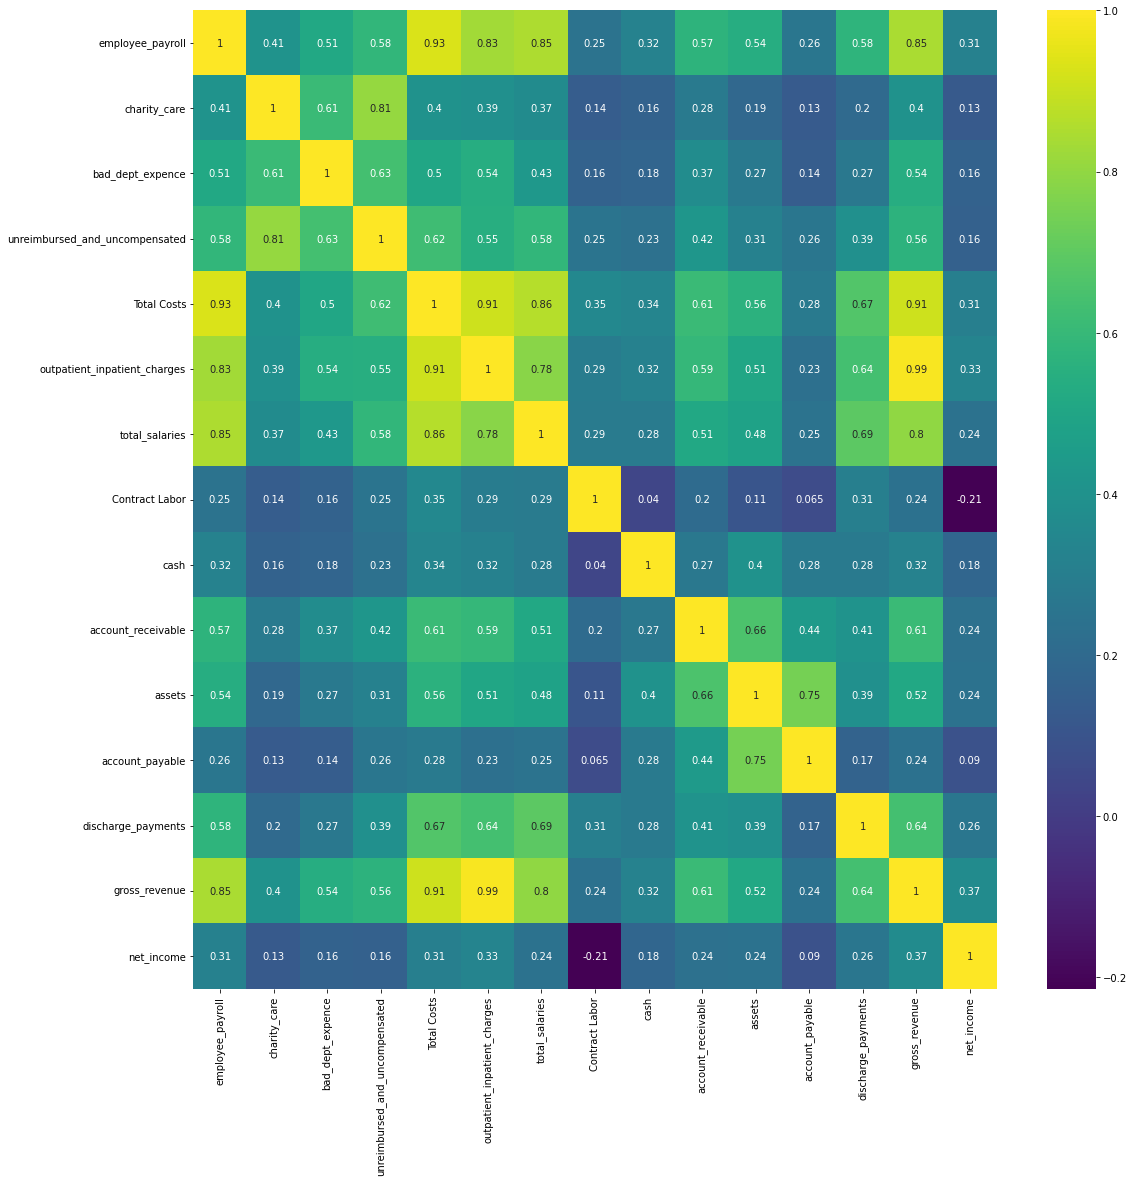

In [32]:
corr=data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,cmap='viridis',annot=True)

<AxesSubplot:xlabel='Total Costs', ylabel='net_income'>

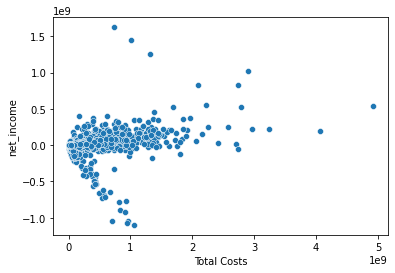

In [33]:
sns.scatterplot(data=data,x='Total Costs',y='net_income')

C:\Users\Rahat\Anaconda3\envs\medenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bad_dept_expence', ylabel='Density'>

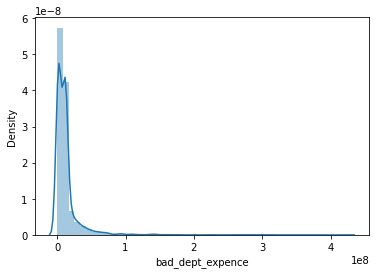

In [34]:
sns.distplot(data['bad_dept_expence'])

C:\Users\Rahat\Anaconda3\envs\medenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_salaries'>

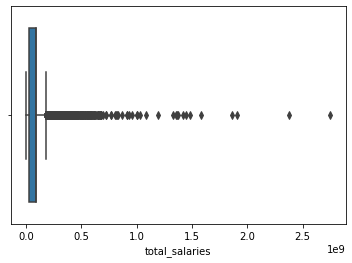

In [35]:

sns.boxplot(data['total_salaries'])

<Figure size 1440x720 with 0 Axes>

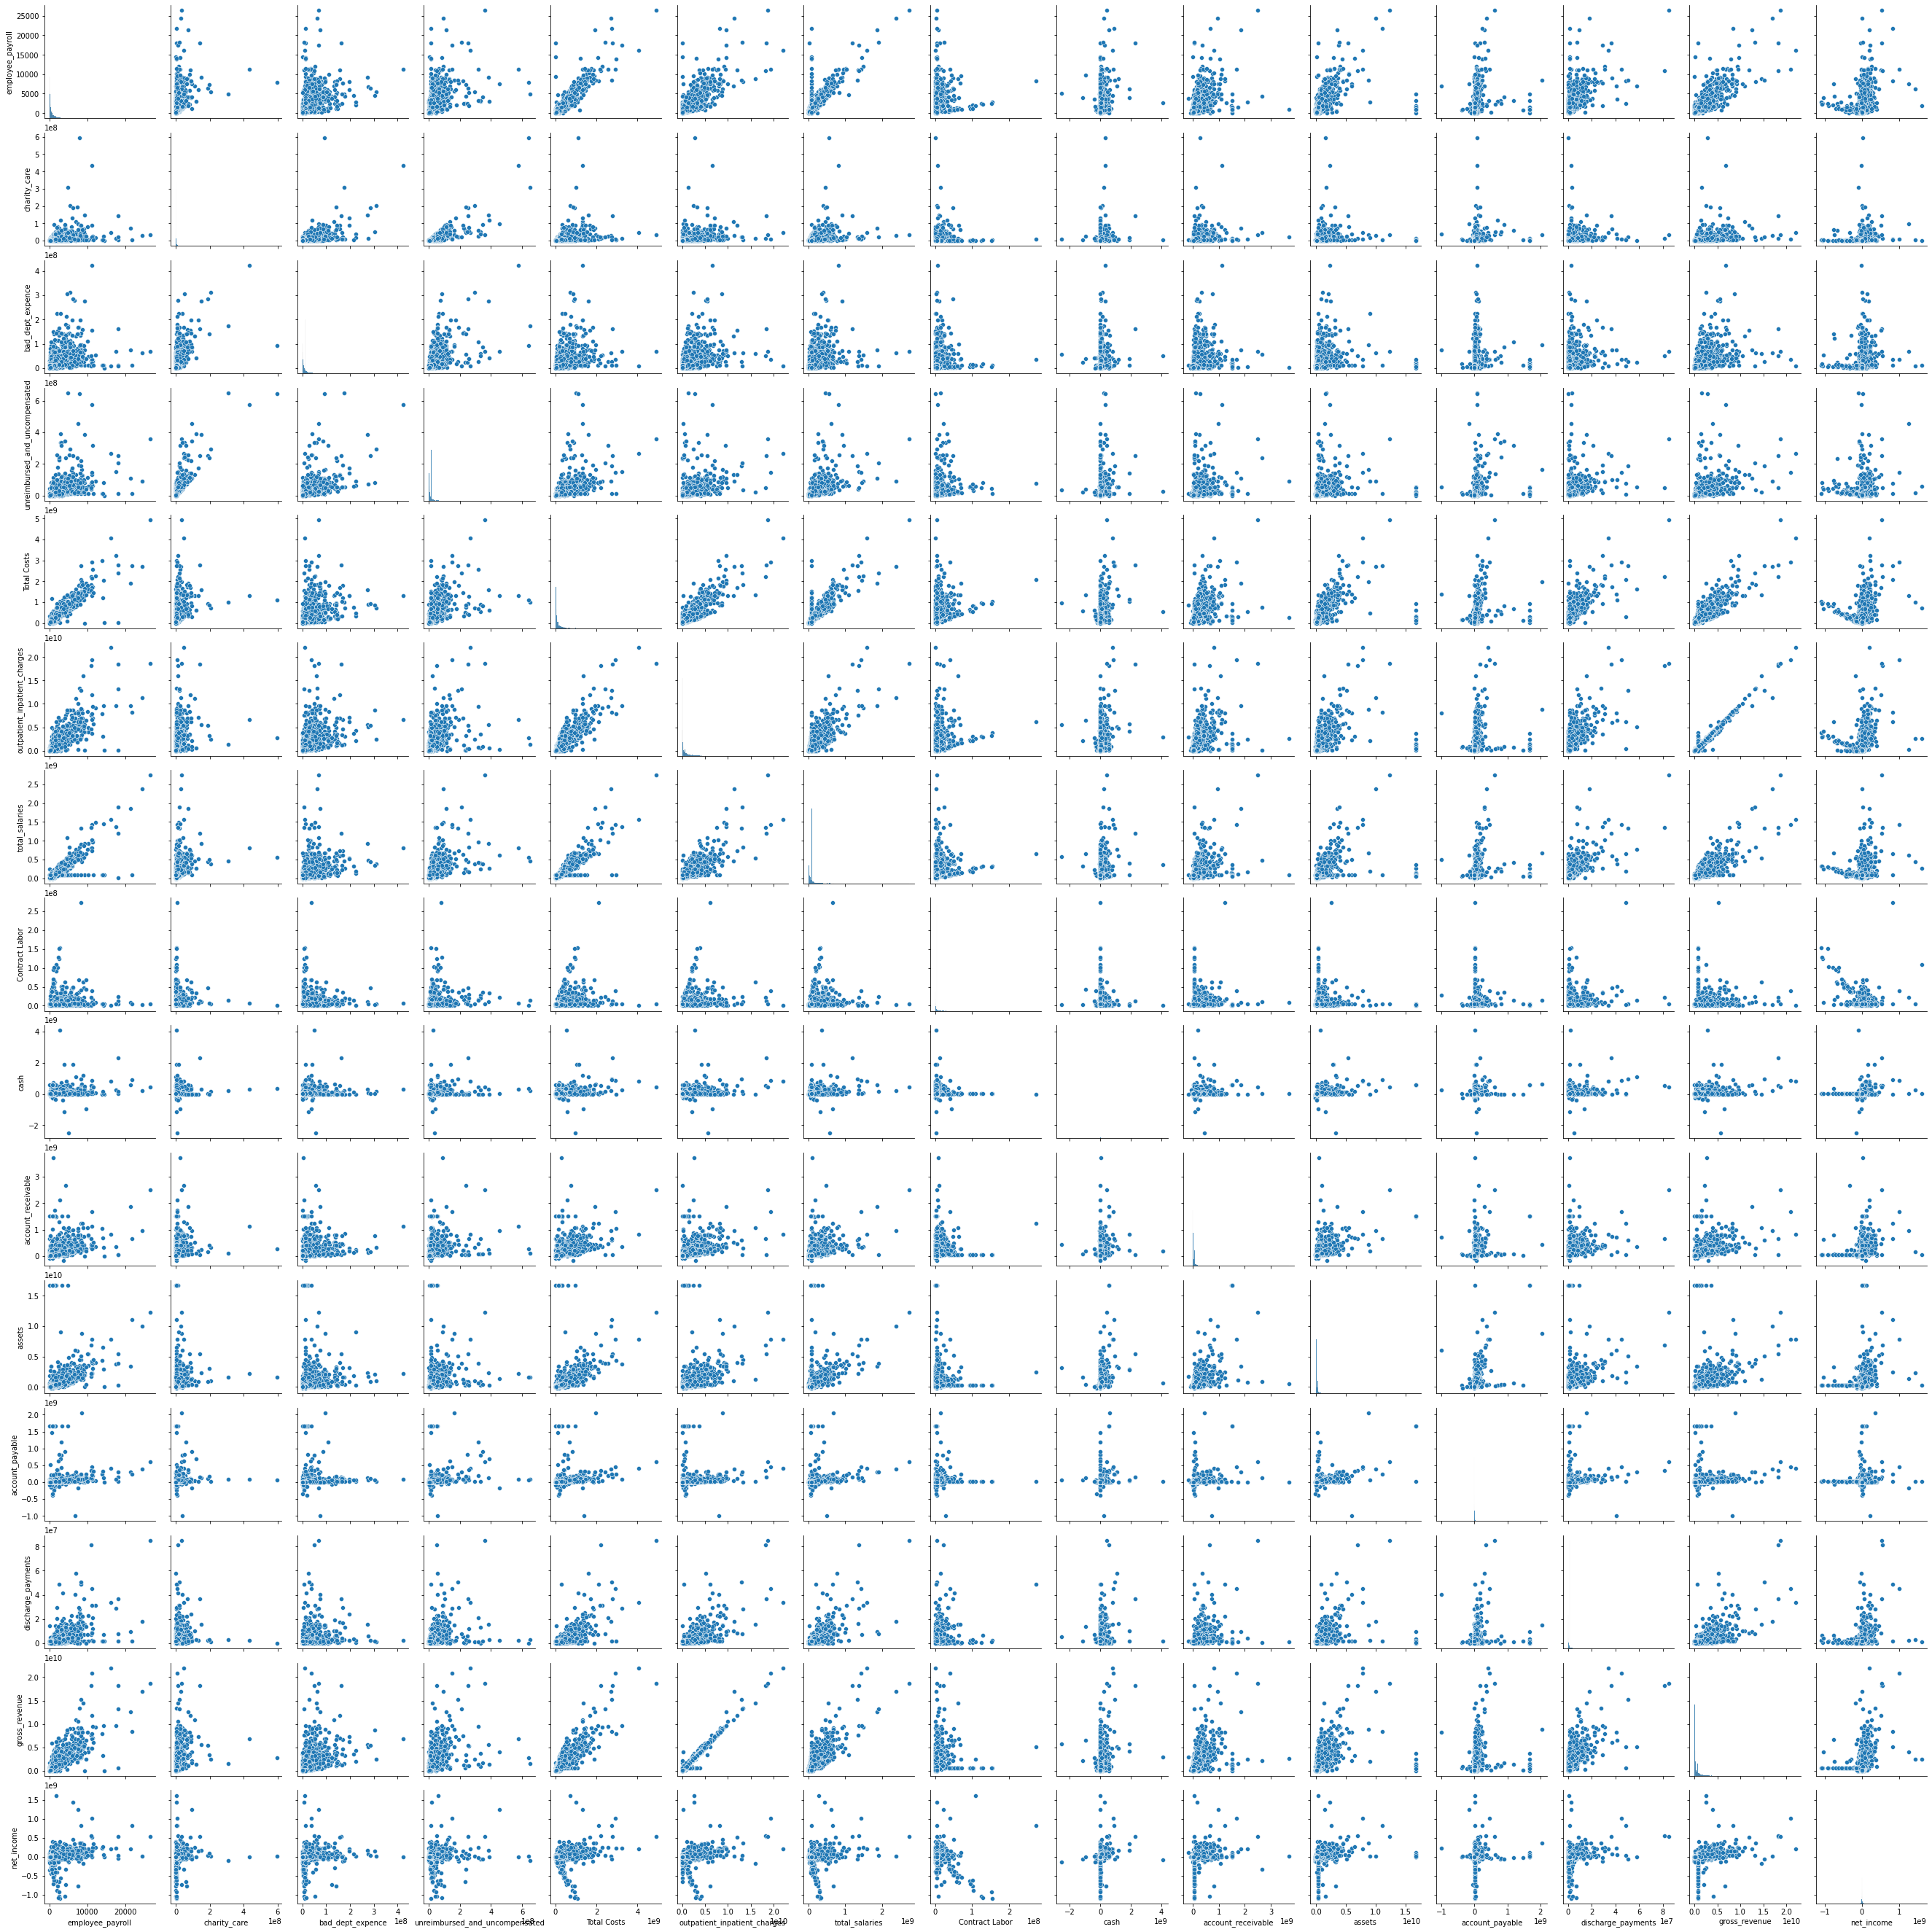

<Figure size 1440x720 with 0 Axes>

In [36]:
sns.pairplot(data)
plt.figure(figsize=(20,10))

In [37]:
!pip install Pandas-Profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=068e6576562ecb31b349bb5e728373dac2df5907c3e050bccf5c641e1ba80b2d
  Stored in directory: c:\users\rahat\appdata\local\pip\cache\wheels\c3\fe\0b\4450b38bceb9ae43dd7d0f16e353566f30f5f4d59a58eca2ed
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=169c5bcaef93ca5d1a50a49719e256b58367ab868bdfa69353d511cb1d6a8707
  Stored in directory: c:\users\rahat\appdata\local\pip\cache\wheels\5e\77\4c\7291601777365dd7db8a3b309006122d515ee5ac086f2f5866
Successfully built htmlmin imagehash
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [38]:
from pandas_profiling import ProfileReport

In [39]:
profile=ProfileReport(data)
profile.to_file(output_file='outmut.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]